<a href="https://colab.research.google.com/github/dnezan/km-prediction/blob/main/KM_forecast_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KwickMetrics Forecast Practice**
Dinesh Sreekanthan<br>
https://github.com/dnezan/km-prediction (private)

# Data Overview
The dataset has 3 columns
<br>
*   SKU ID
*   Date
*   Number of items sold that day

By using the function `=COUNTUNIQUE(A:A)` in Google Spreadsheets, we can find the number of unique items being sold. <br>

**There are 3786 unique items being sold over a period of about 1 year (01.01.2021 - 25.11.2021)**

# Setting up Cloud Drive

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [108]:
!mkdir km-forecast-practice
!ls

mkdir: cannot create directory ‘km-forecast-practice’: File exists
 360review	    km-forecast-practice
'Colab Notebooks'   km-forecast-practice-data.gsheet
 csvfiles	   'Untitled spreadsheet.gsheet'
 Invoice.gsheet


In [109]:
%cd "/content/drive/My Drive/km-forecast-practice"

/content/drive/My Drive/km-forecast-practice


Make sure to move your dataset `km-forecast-practice.csv` to this folder.

In [110]:
!ls

graph.png  graph.svg  km-forecast-practice-data.csv


In [111]:
import pandas as pd
import csv
import datetime

df=pd.read_csv('km-forecast-practice-data.csv')
df['timestamp']= pd.to_datetime(df['timestamp'])
print(df.dtypes)
df.head()


item_id              object
timestamp    datetime64[ns]
demand                int64
dtype: object


,item_id,timestamp,demand
0,AP001AA01,2021-01-01,10
1,AP001AA01,2021-01-02,6
2,AP001AA01,2021-01-03,9
3,AP001AA01,2021-01-04,7
4,AP001AA01,2021-01-05,10


# Preprocessing the Data
The first step is to rearrange the data so that we have each column representing a day and the rows containing the SKU ID. <br> 
We must also populate the data with missing dates, which we assume have 0 items sold on that day. So the first step is to add the missing dates, then set these as 0.

In [112]:
start_date=df.timestamp[0].date()  
end_date=df.timestamp.iat[-1].date()
start_sku=df.item_id[1]
print('Start date is',start_date)
print('End date is',end_date)
print("First SKU is",start_sku)

data = [[start_sku, 0]]

# Populating the new dataset
df_new = pd.DataFrame(data, columns = ['SKU', start_date])
x = start_date

index = 2
var=0

while var<365:
  x+= datetime.timedelta(days=1)
  df_new.insert(loc=index, column=x, value=0)
  index+=1
  var+=1
df_new.head()

Start date is 2021-01-01
End date is 2021-10-08
First SKU is AP001AA01


,SKU,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,...,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,AP001AA01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next we fill in the values of items that were actually sold on a given day.

In [167]:
var=0
count=-1
while var<90:
  for x in df.item_id:
    if x == "AP001AA01": 
      count+=1
      z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
      #print(z)
      z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == "AP001AA01"][0])
      #print(z1)
      df_new.iloc[z1,z] = df.demand[count]
      #print (df.timestamp[count].date())
      #print (df.demand[count])
      var+=1
      
print("This product was sold on",count,"days")
df_new.head()





uniqval = df.item_id.unique()

This product was sold on 313 days


['AP001AA01' 'AP001AA01CA' 'AP001BA01' ... 'WH103EA01' 'WH103EB01'
 'WH103EC01']
3785


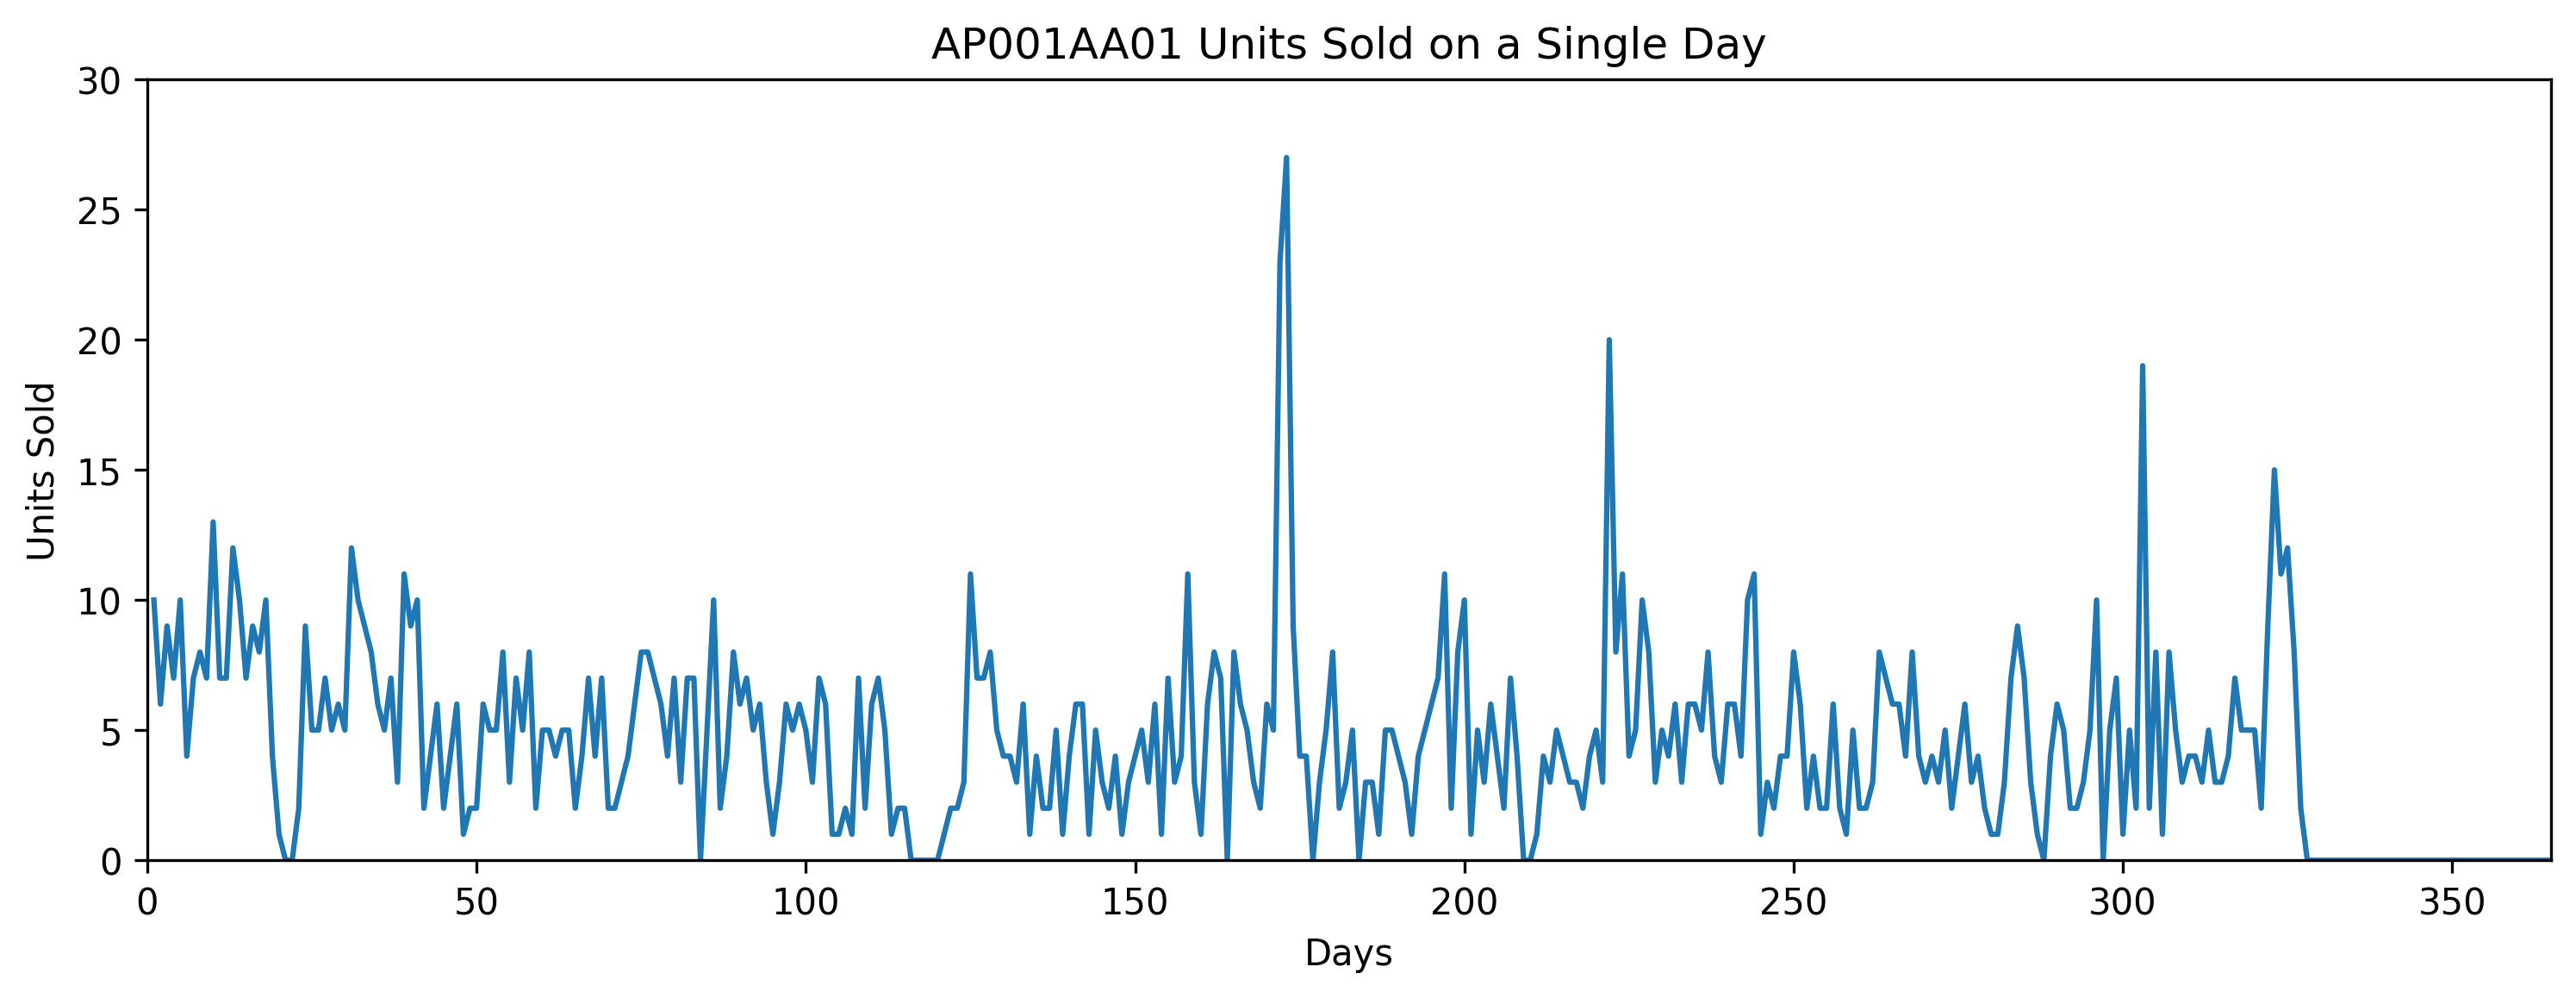

In [161]:
import matplotlib.pyplot as plt
import numpy as np

temp = df_new.iloc[0].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)
plt.xlabel('Days')
plt.ylabel('Units Sold')
plt.title('AP001AA01 Units Sold on a Single Day')
plt.savefig("graph2.png") #PNG saved to Drive
plt.savefig("graph.svg") #Lossless SVG saved to Drive
plt.xlim([0,365])
plt.ylim([0,30])
plt.show()